## Assignment: Predicting Price of House using KNearestNeighbour Regressor

#### Data Set: House Rental Data


### Importing Libraries

In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

### Loding House Rental Dataset

In [26]:
url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'
df = pd.read_csv(url)
df.head()


,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [27]:
# Loading X and Y data shape

array = df.values
x= array[:,:]
y = array[:,:]
print(x.shape, y.shape)

(645, 8) (645, 8)


In [94]:
# 30% of total data is for testing
# Training Dataset

tsize = 0.30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = tsize, random_state = 102)


In [95]:
# Printing the size of training and testing
print('Training Dataset: ',x_train.shape, y_train.shape)
print('Testing Dataset: ',x_test.shape, y_test.shape)


Training Dataset:  (451, 8) (451, 8)
Testing Dataset:  (194, 8) (194, 8)


In [96]:
print("\nKeys of rental_dataset: \n{}".format(df.keys()))



Keys of rental_dataset: 
Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')


In [97]:
# Model Building
knn = KNeighborsClassifier(n_neighbors = 4 )

In [98]:
# defining a function to find distance
import math

def dist(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [99]:
#function to predict values using knn for given test data
def knn_reg(tr_x, tr_y, tx , k):
   
    distances = []
    
    for i in range(tr_x.shape[0]):
        distances.append(dist(tr_x[i], tx))
    distances = np.array(distances)
    inds = np.argsort(distances)
    distances = distances[inds]
    tr_y_sorted = tr_y[inds]
    value = np.average(tr_y_sorted[:k])
    return value

In [101]:
##Function to find mean squared error for the entire test dataset
def knn_mse(tr_x , tr_y, test_x , test_y , k):
    preds = []
    for i in range(test_x.shape[0]):
        value = knn_reg(tr_x, tr_y, test_x[i] , k)
        preds.append(value)
    
    preds  = np.array(preds)
    err = mean_squared_error(test_y , preds)
    return err

In [113]:
maxk=int(math.sqrt(x_train.shape[0]))
mse_val = [] 
for k in range(1,maxk):
    error= knn_mse(x_train , y_train, x_test, y_test,k)
    mse_val.append(error) #store rmse values
    print('MSE value for k= ' , k , 'is:', error)


ValueError: y_true and y_pred have different number of output (8!=1)

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

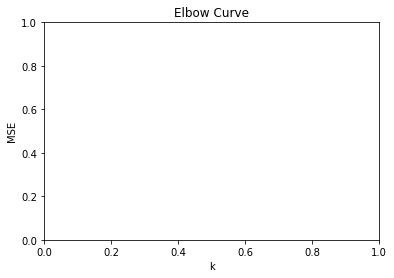

In [110]:
##plotting the elbow curve 
k=np.arange(1,maxk)
xl="k"
yl="MSE"
plt.xlabel(xl) 
plt.ylabel(yl)
plt.title("Elbow Curve")
plt.plot(k,mse_val)
##finding the k for the elbow point 
ke=find_elbow()
print("Best Value of k using elbow curve is ",ke)
plt.plot(ke,mse_val[ke-1],'rx')
plt.annotate("  elbow point", (ke,mse_val[ke-1]))